In [1]:
# import tensorflow as tf
# from keras.models import Model, load_model, Sequential
# from keras.layers import Input, Dense, Flatten, Reshape, Dropout, Lambda, Embedding, InputLayer, Concatenate, Reshape, LeakyReLU
# from keras.regularizers import L1L2
# from keras.optimizers import Adam
# from keras.utils import to_categorical
# from keras.utils.vis_utils import plot_model
# import keras.backend as K
# from keras.callbacks import TensorBoard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from packaging import version
# import tensorboard
# tensorboard.__version__
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from scipy import stats

from EM import network as net
from EM import data_prep
import json
from pathlib import Path
import os
from PIL import Image
import cv2
from joblib import Parallel, delayed

Using TensorFlow backend.


In [2]:
exp_path = 'EM/EM_Exp5/'
best_score = 1
best_id = -999
for i in range(30):
    if i > 9:
        f = open(exp_path+'tmp/'+exp_path[3:]+'trial_{}/trial.json'.format(str(i)))
        curr_iter = json.load(f)
        curr_score = curr_iter['score']
        if curr_score == None:
            continue
        print('The best score is',best_score,'and the current score is',curr_score,'and the current ID','trial_{}'.format(str(i)))
        if best_score>curr_score:
            best_score=curr_score
            best_id='trial_{}'.format(str(i))
    else:
        f = open(exp_path+'tmp/'+exp_path[3:]+'trial_0{}/trial.json'.format(str(i)))
        curr_iter = json.load(f)
        curr_score = curr_iter['score']
        print('The best score is',best_score,'and the current score is',curr_score,'and the current ID','trial_0{}'.format(str(i)))
        if best_score>curr_score:
            best_score=curr_score
            best_id='trial_0{}'.format(str(i))
print('The best trial is',best_id,'with a loss of',best_score)

The best score is 1 and the current score is 0.005912798254590745 and the current ID trial_00
The best score is 0.005912798254590745 and the current score is 0.0034767277256557436 and the current ID trial_01
The best score is 0.0034767277256557436 and the current score is 0.004177083423586957 and the current ID trial_02
The best score is 0.0034767277256557436 and the current score is 0.0065391240923693686 and the current ID trial_03
The best score is 0.0034767277256557436 and the current score is 0.005224830724976279 and the current ID trial_04
The best score is 0.0034767277256557436 and the current score is 0.003850398241833906 and the current ID trial_05
The best score is 0.0034767277256557436 and the current score is 0.006186019756238569 and the current ID trial_06
The best score is 0.0034767277256557436 and the current score is 0.004942990293858027 and the current ID trial_07
The best score is 0.0034767277256557436 and the current score is 0.0035487531397416436 and the current ID t

In [17]:
best_id='trial_01'
f = open(exp_path+'tmp/'+exp_path[3:]+best_id+'/trial.json')
best_iter = json.load(f)
best_parameters = pd.DataFrame(best_iter['hyperparameters']['values'], index=[0])
best_parameters


,hp_neigh_envelope,hp_num_complex_pairs,hp_num_real,hp_beta_units,hp_enc_dec_size,hp_delta_units,hp_l1_reg
0,5,2,5,8,16,16,9.685692e-15


In [5]:
param_list = []
score_list = []

for i in range(20):
    if i > 9:
        best_id='trial_{}'.format(str(i))
        f = open(exp_path+'tmp/'+exp_path[3:]+best_id+'/trial.json')
    else:
        best_id='trial_0{}'.format(str(i))
        f = open(exp_path+'tmp/'+exp_path[3:]+best_id+'/trial.json')
    best_iter = json.load(f)
    best_parameters = pd.DataFrame(best_iter['hyperparameters']['values'], index=[0])

    param_list.append(best_parameters)
    score_list.append(best_iter['score'])

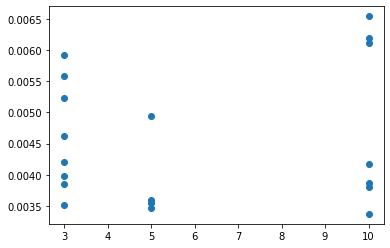

In [6]:
param_for_display = 'hp_neigh_envelope'

x=[]
y=[]

for i in range(len(param_list)):
    x.append(param_list[i][param_for_display].values[0])
    y.append(score_list[i])
    
    
plt.scatter(x,y)

In [18]:
exp_data_path = exp_path+'sim_data/training/nb_neigh_{}/'.format(5)
params={}

### Experiment Parameters ###

params['state_features'] = 1
params['group_features'] = 3


### Hyper Parameters ###
params['hp_neigh_envelope'] = best_parameters['hp_neigh_envelope'].values[0]

params['hp_num_neighbors'] = 50

params['hp_num_complex_pairs'] = best_parameters['hp_num_complex_pairs'].values[0]
params['hp_num_real'] = best_parameters['hp_num_real'].values[0]

params['hp_beta_units'] = best_parameters['hp_beta_units'].values[0]

enc_dec_size = best_parameters['hp_enc_dec_size'].values[0]
params['hp_phi_enc_units'] = enc_dec_size
params['hp_psi_enc_units'] = enc_dec_size
params['hp_psi_dec_units'] = enc_dec_size

params['hp_delta_units'] = best_parameters['hp_delta_units'].values[0]

l1_reg = best_parameters['hp_l1_reg'].values[0]
params['hp_l1_reg'] = l1_reg
params['hp_l2_reg'] = l1_reg*1e-2

In [19]:
ae, pipeline = net.pipeline(params)

In [ ]:
x = np.load(exp_data_path+'x_head.npy')
x_neigh = np.load(exp_data_path+'x_neigh_head.npy')
x_plus = np.load(exp_data_path+'x_plus_head.npy')
x_dot = np.load(exp_data_path+'x_dot_head.npy')
x_dot_max = np.load(exp_data_path+'x_dot_head_max.npy')
# x_dot = x_dot/x_dot.max()

In [ ]:
x.shape,x_neigh.shape,x_plus.shape,x_dot.shape

In [ ]:
x_dot_max

In [21]:
# pipeline.load_weights(exp_path+'Realizations/20230621-124537_pipeline.h5') #EM_Exp_1
pipeline.load_weights(exp_path+'Realizations/20240312-153636_pipeline.h5') #EM_Exp_5

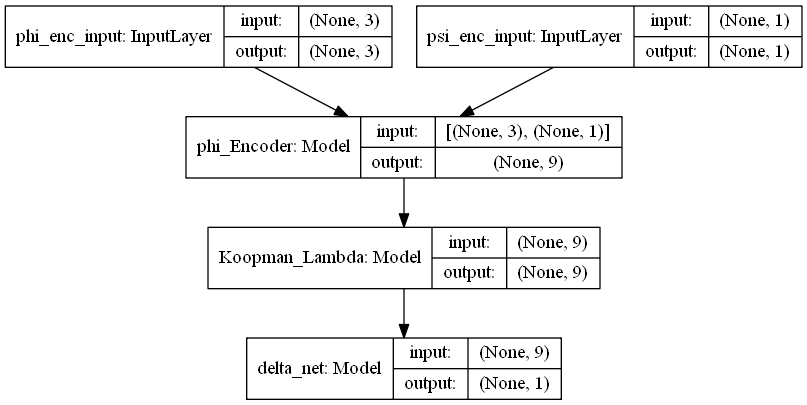

In [20]:
from keras.utils.vis_utils import plot_model
plot_model(pipeline, 'Result_Analysis/'+exp_path+"Pipeline.png", True, True)

In [ ]:
# ####################
# ### Test Dataset ###
# ####################

# ### Import Test Dataset ###

# df_master = pd.read_csv(exp_path+'sim_data/test/test1.csv', sep=' ',names=['Time', 'Agent', 'X', 'Y', 'Heading'])
# df_master.describe()

In [ ]:
# ### Scale Test Dataset ###
# X_min = -35.5
# X_max = 35.5
# Y_min = -35.5
# Y_max = 35.5
# Heading_min = 0
# Heading_max = 360

# df_scaled = df_master.copy()
# df_scaled['X'] = ((df_master['X'] - X_min)/(X_max - X_min)).values
# df_scaled['Y'] = ((df_master['Y'] - Y_min)/(Y_max - Y_min)).values
# heads = []
# for i in df_master['Heading'].values:
#     if 90 - i != abs(90 - i):
#         heads.append(450 - i)
#     else:
#         heads.append(90 - i)

# df_scaled['Heading'] = heads
# df_scaled['Heading'] = ((df_scaled['Heading'] - Heading_min)/(Heading_max - Heading_min)).values

# nb_agents = df_scaled.Agent.max() + 1
# nb_timesteps = df_scaled.Time.max() + 1

# # for i in range(nb_agents):
# #     counter = 0
# #     diff_array = np.diff(df_scaled.loc[(df_scaled.Agent == i)].Heading)
# #     for j in range(1,nb_timesteps):
# #         if abs(diff_array[j-1]) > 0.5:
# #             if diff_array[j-1]*-1 > 0:
# #                 counter += 1
# #             else:
# #                 counter -= 1
# #         df_scaled.loc[(df_scaled.Agent == i) & (df_scaled.Time == j),'Heading'] += counter 

# df_scaled.describe()

In [ ]:
# x = np.load(exp_data_path+'x_head.npy')
# x_neigh = np.load(exp_data_path+'x_neigh_head.npy')
# x_plus = np.load(exp_data_path+'x_plus_head.npy')
# x_dot = np.load(exp_data_path+'x_dot_head.npy')
# x_dot_max = np.load(exp_data_path+'x_dot_head_max.npy')

In [ ]:
# x_dot_max*360

In [ ]:
# tsteps = df_scaled['Time'].unique().shape[0]-1
# ag_nb = 100
# np.sqrt(np.square(df_scaled.loc[(df_scaled.Agent == ag_nb) & (df_scaled.Time < tsteps)]['X'].values - df_scaled.loc[(df_scaled.Agent == ag_nb) & (df_scaled.Time < (tsteps+1)) & (df_scaled.Time > 0)]['X'].values) + np.square(df_scaled.loc[(df_scaled.Agent == ag_nb) & (df_scaled.Time < tsteps)]['Y'].values - df_scaled.loc[(df_scaled.Agent == ag_nb) & (df_scaled.Time < (tsteps+1)) & (df_scaled.Time > 0)]['Y'].values))

In [ ]:
# df_scaled.loc[df_scaled['Time'] == 0,'X']= np.random.random(df_scaled.loc[df_scaled['Time'] == 0,'X'].size)
# df_scaled.loc[df_scaled['Time'] == 0,'Y']= np.random.random(df_scaled.loc[df_scaled['Time'] == 0,'Y'].size)
# df_scaled.loc[df_scaled['Time'] == 0,'Heading']= np.random.random(df_scaled.loc[df_scaled['Time'] == 0,'Heading'].size)

In [ ]:
# df_scaled.loc[df_scaled['Time'] == 0]

In [10]:
############################# Sim Visualization #################################
import tkinter
import math
from PIL import Image, ImageTk

class Boid:
    def __init__(self, agent, screen_size, db):
        self.ts = 0
        self.agent = agent
        self.x = db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].X.values[0]*screen_size
        self.y = db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Y.values[0]*screen_size
        self.heading1 = np.arcsin(np.sin(db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Heading.values[0] *2*np.pi))
        self.heading2 = np.arccos(np.cos(db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Heading.values[0] *2*np.pi))
        self.color = "black"

    def draw_boid(self, canvas):
        size = 5
        x1 = self.x + size * math.cos(self.heading2)
        x2 = self.y + size * math.sin(self.heading1)
        canvas.create_line(self.x, self.y, x1, x2, fill='black', arrow='last', arrowshape=(12.8,16,4.8), width=2, tags=self.agent)

    def flock(self, canvas, db, screen_size, window):
        if (self.ts + 5) <= db.Time.max():
            self.ts += 5
            self.x = db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].X.values[0]*screen_size
            self.y = db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Y.values[0]*screen_size
            self.heading1 = np.arcsin(np.sin(db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Heading.values[0] *2*np.pi))
            self.heading2 = np.arccos(np.cos(db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Heading.values[0] *2*np.pi))
        else:
            window.destroy()
        
        self.draw_boid(canvas)

def initialise_canvas(window, screen_size):
    canvas = tkinter.Canvas(window, width=screen_size, height=screen_size)
    canvas.pack()
    window.resizable(False, False)
    return canvas

def create_boids(canvas, no_of_boids, screen_size, db):
    list_of_boids = []
    for n in range(no_of_boids):
        boid = Boid(n,screen_size,db)
        list_of_boids.append(boid)
        boid.draw_boid(canvas)
    return list_of_boids

def boid_behaviours(canvas, list_of_boids,db,screen_size,window,animation_path):
    canvas.delete('all')
    for boid in list_of_boids:
        boid.flock(canvas,db,screen_size,window)
        
    canvas.postscript(file='Result_Analysis/'+exp_path+animation_path+"my_sim_ts_{}.ps".format(list_of_boids[0].ts), colormode='color')
    canvas.after(1, boid_behaviours, canvas, list_of_boids,db,screen_size,window,animation_path)

def vizualize(db,animation_path):
    screen_size = 300
    no_of_boids = int(db.Agent.max() + 1)
    window = tkinter.Tk()
    canvas = initialise_canvas(window, screen_size)
    list_of_boids = create_boids(canvas, no_of_boids, screen_size, db)
    boid_behaviours(canvas, list_of_boids,db,screen_size,window,animation_path)
    window.mainloop()

In [11]:
def sim_test_case(max_turn_angle,neigh_env,df_scaled,nb_timesteps):
    ### Simulate Test Case ###
    # df_scaled = df_scaled.loc[df_scaled['Case'] == 1].drop(['Case'],axis=1)
    x_dot_max = max_turn_angle/360
    df_initial_state = df_scaled.loc[df_scaled['Time'] == 0].copy()
    nb_agents = df_scaled['Agent'].unique().shape[0]
    agent_velocity = 0.0028169
    for ts in range(1,nb_timesteps):
        print('Simulating Time Step',ts,'out of',nb_timesteps-1)
        flock = df_initial_state.loc[df_initial_state['Time']==ts-1][['X','Y']]
        nbrs = NearestNeighbors(n_neighbors=params['hp_num_neighbors']+1, algorithm='ball_tree').fit(flock.values)
        distances, indices = nbrs.kneighbors(flock.values)
        for agent in range(nb_agents):
            # Prepare sim inputs for current timestep using previous timestep

            # neigbours = identify_neighbours(agent,df_initial_state,ts-1)
            neigbours = indices[agent][1:]
            nb_dist = distances[agent][1:]
            # if agent == 0:
            #     print(neigbours)
            test_sim_x = data_prep.data_prep_x_group(agent,neigbours,nb_dist,df_initial_state,ts-1,k=params['hp_num_neighbors'],p=neigh_env)
            test_sim_x = test_sim_x[np.newaxis,:]

            test_x_head = np.reshape(np.asarray(test_sim_x)[:,0],(np.asarray(test_sim_x)[:,0].shape[0],-1))
            test_x_neigh_head = np.asarray(test_sim_x)[:,1:]

            old_x = df_initial_state.loc[(df_initial_state['Agent'] == agent) & (df_initial_state['Time'] == ts-1)]['X'].values[0]
            old_y = df_initial_state.loc[(df_initial_state['Agent'] == agent) & (df_initial_state['Time'] == ts-1)]['Y'].values[0]
            old_head = df_initial_state.loc[(df_initial_state['Agent'] == agent) & (df_initial_state['Time'] == ts-1)]['Heading'].values[0]

            # Predict outputs for current timestep
            y_pred = pipeline.predict([test_x_neigh_head,test_x_head])
            new_head = y_pred[0][0]*x_dot_max + old_head
            # if agent == 0:
            #     print(new_head)

            if(new_head>1):
                new_head -= 1
            elif(new_head<0):
                new_head += 1

            new_x = old_x + np.cos(2*np.pi*new_head)*agent_velocity

            if(new_x>1):
                new_x -= 1
            elif(new_x<0):
                new_x += 1

            new_y = old_y + np.sin(2*np.pi*new_head)*agent_velocity
            
            if(new_y>1):
                new_y -= 1
            elif(new_y<0):
                new_y += 1

            df_initial_state = df_initial_state.append(pd.DataFrame(np.concatenate([np.asarray([ts,agent]), np.asarray([new_x,new_y,new_head])]).reshape(1,-1),columns=list(df_initial_state)),ignore_index=True)
    
    return df_initial_state

In [ ]:
test_list = ['test3','test4','test5','test1','test2']
neigh_env_list = [3,10]
max_turn_list = [9,18]
nb_timesteps = 301
exp_path = 'EM/EM_Exp5/'
# for test_case in test_list:
def pred_testcase(test_case):
    for neigh_env in neigh_env_list:
        for max_turn in max_turn_list:
            ####################
            ### Test Dataset ###
            ####################

            ### Import Test Dataset ###

            df_master = pd.read_csv(exp_path+'sim_data/test/{}.csv'.format(test_case), sep=' ',names=['Time', 'Agent', 'X', 'Y', 'Heading'])
            # df_master.describe()

            ### Scale Test Dataset ###
            X_min = -35.5
            X_max = 35.5
            Y_min = -35.5
            Y_max = 35.5
            Heading_min = 0
            Heading_max = 360

            df_scaled = df_master.copy()
            df_scaled['X'] = ((df_master['X'] - X_min)/(X_max - X_min)).values
            df_scaled['Y'] = ((df_master['Y'] - Y_min)/(Y_max - Y_min)).values
            heads = []
            for i in df_master['Heading'].values:
                if 90 - i != abs(90 - i):
                    heads.append(450 - i)
                else:
                    heads.append(90 - i)

            df_scaled['Heading'] = heads
            df_scaled['Heading'] = ((df_scaled['Heading'] - Heading_min)/(Heading_max - Heading_min)).values

            df_initial_state = sim_test_case(max_turn,neigh_env,df_scaled,nb_timesteps)
            animation_path='Simulated_results_500ts_{}_{}p{}d/'.format(test_case,neigh_env,max_turn)
            df_initial_state.to_pickle('Result_Analysis/'+exp_path+animation_path+'20240312_Simulated_results_500ts_{}_{}p{}d'.format(test_case,neigh_env,max_turn))

            df_initial_state = pd.read_pickle('Result_Analysis/'+exp_path+animation_path+'20240312_Simulated_results_500ts_{}_{}p{}d'.format(test_case,neigh_env,max_turn))
            vizualize(df_initial_state,animation_path)

            for i in range(int((nb_timesteps-1)/5)):
                psimage=Image.open('Result_Analysis/'+exp_path+animation_path+'my_sim_ts_{}.ps'.format(5*(i+1)))
                psimage.save('Result_Analysis/'+exp_path+animation_path+'my_sim_ts_{}.png'.format(5*(i+1)))

            video_name = 'Result_Analysis/'+exp_path+animation_path+'video.avi'

            images = []
            for i in range(3,int((nb_timesteps-1)/5)):
                images.append('Result_Analysis/'+exp_path+animation_path+'my_sim_ts_{}.png'.format(5*(i+1)))
            frame = cv2.imread(images[0])
            height, width, layers = frame.shape

            video = cv2.VideoWriter(video_name, 0, 3, (width,height))

            for image in images:
                video.write(cv2.imread(image))

            cv2.destroyAllWindows()
            video.release()
            
for x in test_list:
    pred_testcase(x)

Test Case test5 Neighbour env 3 Max turn 9 ======= Growth rate 0.03 %
Test Case test5 Neighbour env 3 Max turn 18 ======= Growth rate 0.18 %
Test Case test5 Neighbour env 10 Max turn 9 ======= Growth rate 0.24 %
Test Case test5 Neighbour env 10 Max turn 18 ======= Growth rate 0.28 %


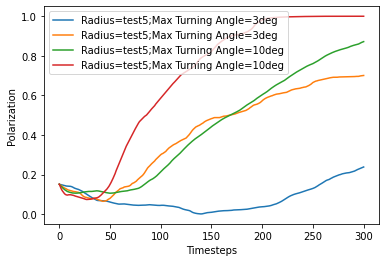

In [32]:
# test_list = ['test1','test2','test3','test4','test5']
test_list = ['test5']
neigh_env_list = [3,10]
max_turn_list = [9,18]
# neigh_env_list = [3]
# max_turn_list = [9]
nb_timesteps = 301
exp_path = 'EM/EM_Exp5/'
# plt.figure(figsize=(10,7))
for test_case in test_list:
    for neigh_env in neigh_env_list:
        for max_turn in max_turn_list:
            df_initial_state = pd.read_pickle('Result_Analysis/'+exp_path+'Simulated_results_500ts_{}_{}p{}d/'.format(test_case,neigh_env,max_turn)+'20240312_Simulated_results_500ts_{}_{}p{}d'.format(test_case,neigh_env,max_turn))
            pred_pol_l = []
            for ts in range(nb_timesteps):
                pred_head = df_initial_state.loc[df_initial_state.Time == ts].Heading
                pred_pol = np.sqrt((np.sum(np.sin(2*np.pi*pred_head)))**2 + (np.sum(np.cos(2*np.pi*pred_head)))**2)/(df_initial_state.Agent.max()+1)
                pred_pol_l.append(pred_pol)
            plt.plot(pred_pol_l,label='Radius={};Max Turning Angle={}deg'.format(test_case,neigh_env,max_turn))
            plt.xlabel('Timesteps')
            plt.ylabel('Polarization')
            plt.legend()
            print('Test Case {} Neighbour env {} Max turn {} ======= Growth rate {} %'.format(test_case,neigh_env,max_turn,np.round(np.mean(np.diff(pred_pol_l)[0:nb_timesteps])*100,2)))
# plt.savefig('Result_Analysis/'+exp_path+'varying_emergence.png')


In [ ]:
# for test_case in test_list:
#     for neigh_env in neigh_env_list:
#         for max_turn in max_turn_list:
#             animation_path='Simulated_results_500ts_{}_{}p{}d/'.format(test_case,neigh_env,max_turn)
#             df_initial_state = pd.read_pickle('Result_Analysis/'+exp_path+animation_path+'20240312_Simulated_results_500ts_{}_{}p{}d'.format(test_case,neigh_env,max_turn))
#             vizualize(df_initial_state)

#             for i in range(100):
#                 psimage=Image.open('Result_Analysis/'+exp_path+animation_path+'my_sim_ts_{}.ps'.format(5*(i+1)))
#                 psimage.save('Result_Analysis/'+exp_path+animation_path+'my_sim_ts_{}.png'.format(5*(i+1)))

#             video_name = 'Result_Analysis/'+exp_path+animation_path+'video.avi'

#             images = []
#             for i in range(3,100):
#                 images.append('Result_Analysis/'+exp_path+animation_path+'my_sim_ts_{}.png'.format(5*(i+1)))
#             frame = cv2.imread(images[0])
#             height, width, layers = frame.shape

#             video = cv2.VideoWriter(video_name, 0, 3, (width,height))

#             for image in images:
#                 video.write(cv2.imread(image))

#             cv2.destroyAllWindows()
#             video.release()

In [ ]:
df_initial_state.to_pickle('Result_Analysis/'+exp_path+'20240305_Simulated_results_500ts_test1_10p18d')
# df_initial_state = pd.read_pickle('Result_Analysis/'+exp_path+'20240305_Simulated_results_500ts_test1_3p18d')

In [ ]:
ag = 13
err_thresh = 0.05
plt.errorbar(range(nb_timesteps),df_scaled.loc[(df_scaled.Agent == ag) & (df_scaled.Time < nb_timesteps)].Heading,yerr=err_thresh,label='Observed')
plt.plot(range(nb_timesteps), df_initial_state.loc[(df_initial_state.Agent == ag) & (df_initial_state.Time < nb_timesteps)].Heading,label='Simulated')
plt.legend()

In [ ]:
nb_timesteps = 100

In [ ]:
for ag in range(200):
    plt.plot(range(nb_timesteps), df_initial_state.loc[(df_initial_state.Agent == ag) & (df_initial_state.Time < nb_timesteps)].Heading,label='Simulated')

In [ ]:
for ag in range(200):
    plt.plot(range(301), df_scaled.loc[(df_scaled.Agent == ag) & (df_scaled.Time < 301)].Heading,label='Observed')

In [ ]:
error_list = []
for i in range(nb_timesteps):#df_scaled['Time'].unique().shape[0]):
    pred = df_initial_state[df_initial_state.Time==i][['Heading']].values
    true = df_scaled.loc[df_scaled.Time==i][['Heading']].values
    error = np.mean(np.abs(pred-true))
    error_list.append(error)

plt.plot(error_list)
plt.xscale('log')

In [ ]:
error_list = []
for i in range(nb_timesteps):
    pred_X = df_initial_state[df_initial_state.Time==i][['X']].values
    true_X = df_scaled.loc[df_scaled.Time==i][['X']].values
    pred_Y = df_initial_state[df_initial_state.Time==i][['Y']].values
    true_Y = df_scaled.loc[df_scaled.Time==i][['Y']].values
    error = 0.5*(np.mean(np.abs(pred_X-true_X)) + np.mean(np.abs(pred_Y-true_Y)))
    error_list.append(error)

plt.plot(error_list)
plt.xscale('log')

In [ ]:
(np.array(error_list)<=0.05).sum()

In [ ]:
t_step = 10
bins = 8
df_prediction = df_initial_state.loc[(df_initial_state.Time == t_step)]
df_ground_truth = df_scaled.loc[(df_scaled.Time == t_step)]
plt.imshow(stats.binned_statistic_2d(df_ground_truth.X, df_ground_truth.Y, None, 'count', bins=bins).statistic, interpolation='quadric', vmin=0,vmax=7)
plt.colorbar()



In [ ]:
plt.imshow(stats.binned_statistic_2d(df_prediction.X, df_prediction.Y, None, 'count', bins=bins).statistic, interpolation='quadric', vmin=0,vmax=7)
plt.colorbar()

In [ ]:
pred_pol_l = []
obs_pol_l = []
for ts in range(nb_timesteps):
    pred_head = df_initial_state.loc[df_initial_state.Time == ts].Heading
    obs_head = df_scaled.loc[df_scaled.Time == ts].Heading

    pred_pol = np.sqrt((np.sum(np.sin(2*np.pi*pred_head)))**2 + (np.sum(np.cos(2*np.pi*pred_head)))**2)/(df_initial_state.Agent.max()+1)
    obs_pol = np.sqrt((np.sum(np.sin(2*np.pi*obs_head)))**2 + (np.sum(np.cos(2*np.pi*obs_head)))**2)/(df_scaled.Agent.max()+1)

    pred_pol_l.append(pred_pol)
    obs_pol_l.append(obs_pol)

In [ ]:
plt.plot(obs_pol_l,label='Observed')
plt.plot(pred_pol_l,label='Simulated')
plt.legend()

In [ ]:
np.mean(np.diff(pred_pol_l)[0:100])*100

In [ ]:
np.diff(pred_pol_l)[0:100]

In [ ]:
############################# Sim Visualization #################################
import tkinter
import math
from PIL import Image, ImageTk

class Boid:
    def __init__(self, agent, screen_size, db):
        self.ts = 0
        self.agent = agent
        self.x = db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].X.values[0]*screen_size
        self.y = db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Y.values[0]*screen_size
        self.heading1 = np.arcsin(np.sin(db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Heading.values[0] *2*np.pi))
        self.heading2 = np.arccos(np.cos(db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Heading.values[0] *2*np.pi))
        self.color = "black"

    def draw_boid(self, canvas):
        size = 5
        x1 = self.x + size * math.cos(self.heading2)
        x2 = self.y + size * math.sin(self.heading1)
        canvas.create_line(self.x, self.y, x1, x2, fill='black', arrow='last', arrowshape=(12.8,16,4.8), width=2, tags=self.agent)

    def flock(self, canvas, db, screen_size, window):
        if (self.ts + 5) <= db.Time.max():
            self.ts += 5
            self.x = db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].X.values[0]*screen_size
            self.y = db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Y.values[0]*screen_size
            self.heading1 = np.arcsin(np.sin(db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Heading.values[0] *2*np.pi))
            self.heading2 = np.arccos(np.cos(db.loc[(db['Agent'] == self.agent) & (db['Time'] == self.ts)].Heading.values[0] *2*np.pi))
        else:
            window.destroy()
        
        self.draw_boid(canvas)

def initialise_canvas(window, screen_size):
    canvas = tkinter.Canvas(window, width=screen_size, height=screen_size)
    canvas.pack()
    window.resizable(False, False)
    return canvas

def create_boids(canvas, no_of_boids, screen_size, db):
    list_of_boids = []
    for n in range(no_of_boids):
        boid = Boid(n,screen_size,db)
        list_of_boids.append(boid)
        boid.draw_boid(canvas)
    return list_of_boids

def boid_behaviours(canvas, list_of_boids,db,screen_size,window,animation_path):
    canvas.delete('all')
    for boid in list_of_boids:
        boid.flock(canvas,db,screen_size,window)
        
    canvas.postscript(file='Result_Analysis/'+exp_path+animation_path+"my_sim_ts_{}.ps".format(list_of_boids[0].ts), colormode='color')
    canvas.after(1, boid_behaviours, canvas, list_of_boids,db,screen_size,window)

def vizualize(db,animation_path):
    screen_size = 300
    no_of_boids = int(db.Agent.max() + 1)
    window = tkinter.Tk()
    canvas = initialise_canvas(window, screen_size)
    list_of_boids = create_boids(canvas, no_of_boids, screen_size, db)
    boid_behaviours(canvas, list_of_boids,db,screen_size,window,animation_path)
    window.mainloop()

In [ ]:
vizualize(df_initial_state)
# vizualize(df_scaled)

In [ ]:
from PIL import Image

for i in range(100):
    psimage=Image.open('Result_Analysis/'+exp_path+animation_path+'my_sim_ts_{}.ps'.format(5*(i+1)))
    psimage.save('Result_Analysis/'+exp_path+animation_path+'my_sim_ts_{}.png'.format(5*(i+1)))

In [ ]:
# import imageio
# images = []
# for i in range(3,100):
#     images.append(imageio.imread('Result_Analysis/'+exp_path+'my_sim_ts_{}.png'.format(5*(i+1))))
# imageio.mimsave('Result_Analysis/'+exp_path+'movie.gif', images)

In [ ]:
import cv2
import os

image_folder = 'Result_Analysis/'+exp_path
video_name = 'video.avi'

# images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images = []
for i in range(3,100):
    images.append('Result_Analysis/'+exp_path+animation_path+'my_sim_ts_{}.png'.format(5*(i+1)))
frame = cv2.imread(images[0])
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 3, (width,height))

for image in images:
    video.write(cv2.imread(image))

cv2.destroyAllWindows()
video.release()